In [1]:
# import packages
import pandas as pd
pd.set_option("display.precision", 2)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pylab import *
sns.set()

In [98]:
# read summary data
df_summary_CTB_plus = pd.read_csv('../data/tox21-data/class_info_adapted_+CTB.csv')
df_summary_CTB_minus = pd.read_csv('../data/tox21-data/class_info_adapted2_-CTB.csv')
df_summary_CTB_plus["cytotox"] = "yes"
df_summary_CTB_minus["cytotox"] = "no"
df_summary_CTB = pd.concat([df_summary_CTB_plus, df_summary_CTB_minus])
df_summary_CTB['class_id'] = df_summary_CTB['class_id'].str.replace("_", "")
df_summary_CTB = df_summary_CTB.rename(columns={'class_id': 'class'})
#df_summary_CTB.perc_hit = df_summary_CTB.sum_hitc/df_summary_CTB.unique_DTXSID*100
d = {"no": False, "yes": True}
#np.where(df['DTXSID_count']!= '[]', True, False)
df_summary_CTB["cytotox"] = df_summary_CTB["cytotox"].replace({"yes": 1, "no": 0})
df_ctb = df_summary_CTB.rename(columns={"cytotox": "ctb", "unique_DTXSID": "DTXSID_count"})
df_ctb = df_ctb[df_ctb.columns.difference(["sum_hitc","unique_aenm", "unique_aeid", "count_hitc"])]
df_ctb.head(3)
df_ctb["DTXSID_count_is_high"] = np.where(df_ctb['DTXSID_count'] > 3000, True, False)
df_ctb["perc_hit_is_high"] = np.where(df_ctb['perc_hit'] > 10, True, False)
df_ctb.head(5)

,DTXSID_count,class,ctb,perc_hit,DTXSID_count_is_high,perc_hit_is_high
0,6720,class14,1,0.38,True,False
1,824,class143,1,1.57,False,False
2,6644,class16,1,0.84,True,False
3,633,class176,1,11.85,False,True
4,1567,class179,1,3.61,False,False


In [114]:
df_summary_CTB.perc_hit.min()

0.1178376785977316

In [43]:
print(df_ctb.columns)
print(df_ctb.size)
print(df_ctb.shape)
#print(df_summary_CTB.head)
#print(df_summary_CTB.info)
#print(df_summary_CTB.dtypes)
#print(df_summary_CTB.describe())

Index(['DTXSID_count', 'class', 'ctb', 'perc_hit', 'DTXSID_count_is_high',
       'perc_hit_is_high'],
      dtype='object')
5148
(858, 6)


In [99]:
df_ctb["ctb"].value_counts()
df_ctb["ctb"].value_counts(normalize=True)
df_ctb.sort_values(by="perc_hit", ascending=False).head()
df_ctb.sort_values(by=["perc_hit", "DTXSID_count"], ascending=[True, False]).head()
df_ctb["perc_hit"].mean()
df_ctb[df_ctb["ctb"] == 1].mean()
df_ctb[df_ctb["ctb"] == 0]["DTXSID_count"].mean()
df_ctb[(df_ctb["ctb"] == 1) & (df_ctb["perc_hit"] > 5)]["DTXSID_count"].max()
df_ctb.groupby(by=["ctb"])["DTXSID_count","perc_hit"].mean()
columns_2_show = ["DTXSID_count", "perc_hit"]
df_ctb.groupby(["ctb"])[columns_2_show].describe(percentiles=[])
df_ctb.groupby(["ctb"])[columns_2_show].agg([np.mean, np.std, np.min, np.max])
df_ctb['perc_hit_is_high'] =  np.where(df_ctb.perc_hit > 5 , 1, 0) 
pd.crosstab(df_ctb.ctb, df_ctb.perc_hit_is_high)
pd.crosstab(df_ctb.ctb, df_ctb.perc_hit_is_high, normalize=True)
# df_summary_CTB.drop(["perc_hit_is_high", "perc_hit"], axis=1, inplace=True)
pd.crosstab(df_ctb.ctb, df_ctb.perc_hit_is_high, margins=True)

perc_hit_is_high,0,1,All
ctb,,,
0,195,263,458
1,329,71,400
All,524,334,858


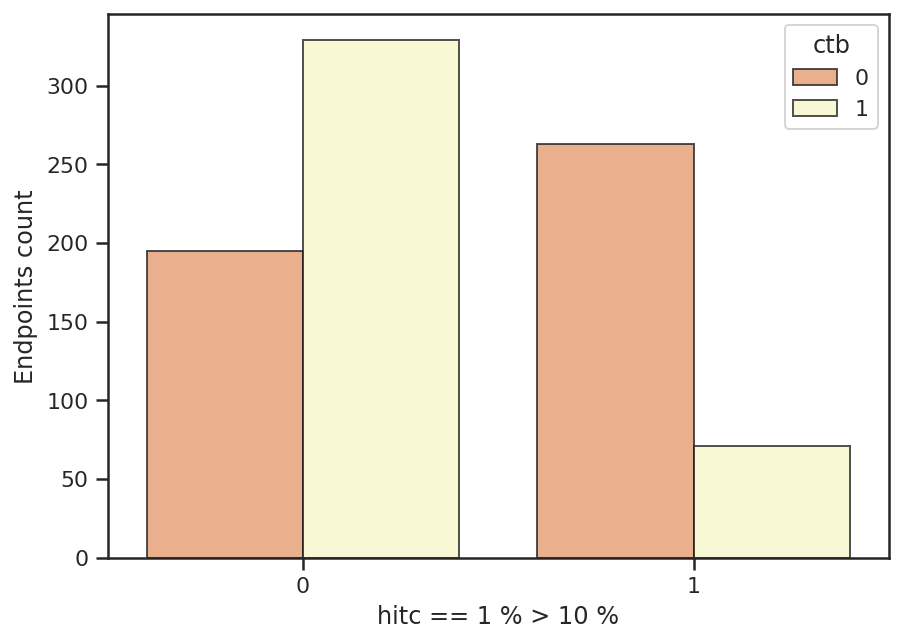

In [155]:
%config InlineBackend.figure_format = 'retina'
palette = sns.color_palette("RdYlGn", 3)
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style("ticks")
g = sns.countplot(x="perc_hit_is_high", hue="ctb", data=df_ctb, palette=palette,
                  alpha = 0.75, edgecolor="k")
g.set(xlabel='hitc == 1 % > 10 %', ylabel='Endpoints count')

plt.savefig('../plots/tox21/barplot_perchitishigh-per-ctb.svg', bbox_inches = 'tight', dpi=300)

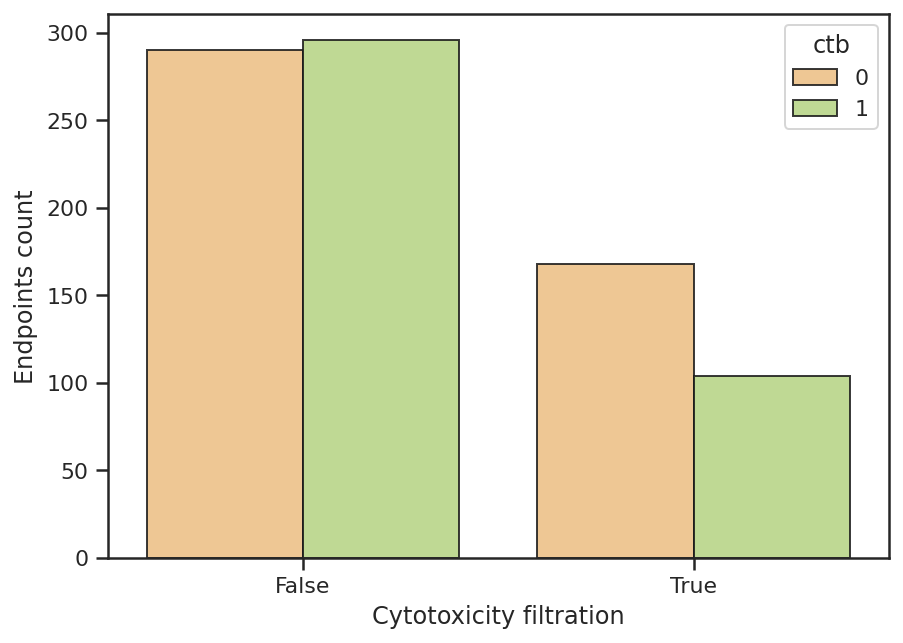

In [136]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style("ticks")
g = sns.countplot(x="DTXSID_count_is_high", hue="ctb", data=df_ctb, palette="RdYlGn",
                  alpha = 0.85, edgecolor="k")
g.set(xlabel='DTXSID > 3000', ylabel='Endpoints count')

plt.savefig('../plots/tox21/barplot_DTXSIDishigh-per-ctb.svg', bbox_inches = 'tight', dpi=300)

<Figure size 504x360 with 0 Axes>

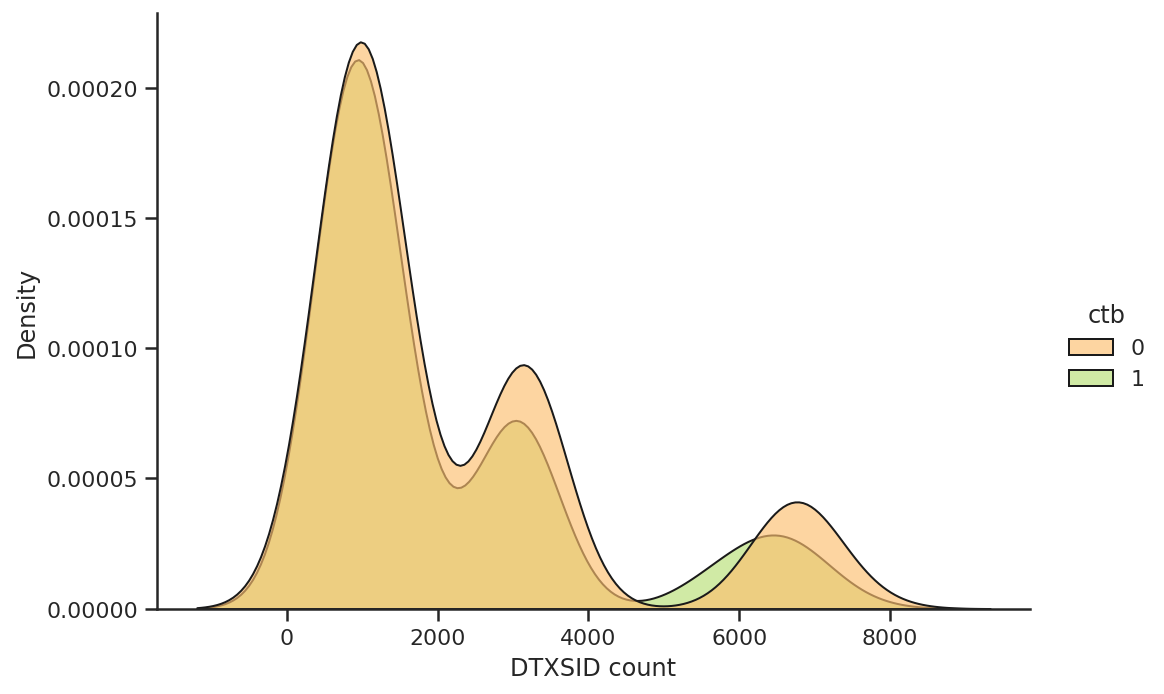

In [129]:
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.displot(data=df_ctb, x='DTXSID_count', hue='ctb', kind='kde', fill=True, palette="RdYlGn",
            height=5, aspect=1.5, alpha = 0.65, edgecolor="k")
g.set(xlabel='DTXSID count')
plt.savefig('../plots/tox21/kdeplot_DTXSID-per-ctb.svg', bbox_inches = 'tight', dpi=300)

<Figure size 504x360 with 0 Axes>

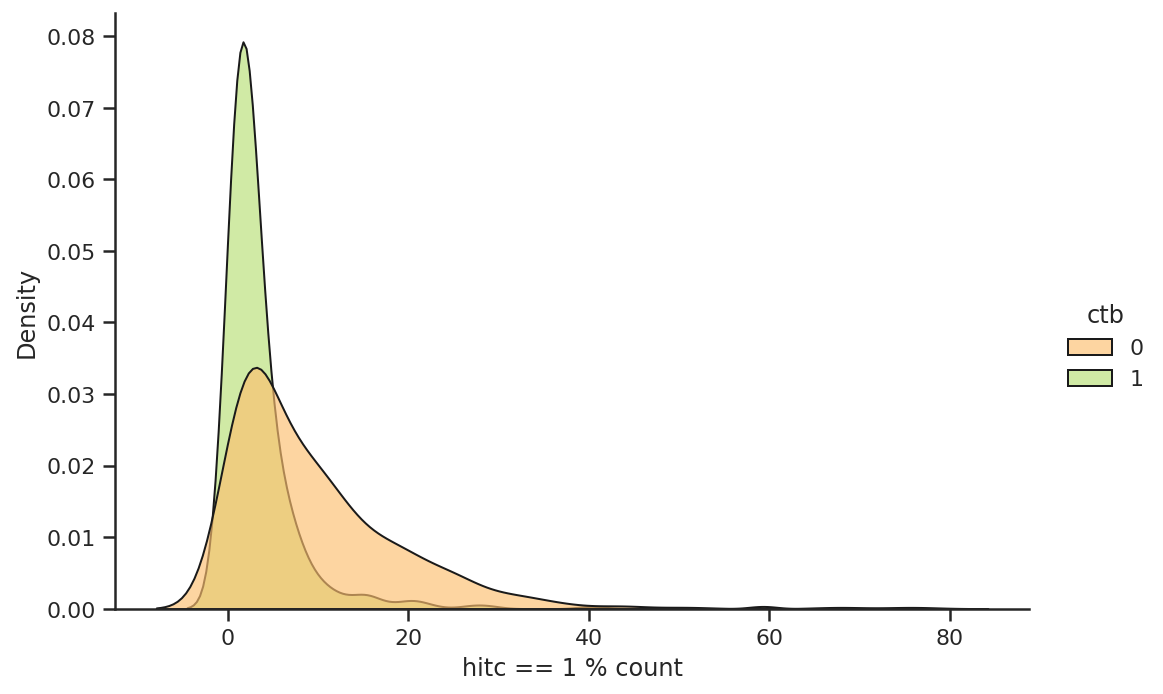

In [130]:
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.displot(data=df_ctb, x='perc_hit', hue='ctb', kind='kde', fill=True, palette="RdYlGn",
            height=5, aspect=1.5, alpha = 0.65, edgecolor="k")
g.set(xlabel='hitc == 1 % count')
plt.savefig('../plots/tox21/kdeplot_hitc-per-ctb.svg', bbox_inches = 'tight', dpi=300)

In [ ]:
df_ctb_melted = pd.melt(df_ctb, 
   id_vars = ['class', 'ctb'], 
   value_vars = ['DTXSID_count', 'perc_hit'], 
   var_name = 'Variable', 
   value_name = 'Value')
df_ctb_melted.columns
df_ctb_melted.head(4)

In [ ]:
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.displot(data=df_ctb, x='DTXSID_count', hue='ctb', multiple="stack", palette="RdYlGn",
            height=5, aspect=1.5, alpha = 0.85, edgecolor="k")
g.set(xlabel='DTXSID count', ylabel='Endpoint count')
plt.savefig('../plots/tox21/kdeplot_DTXSID-per-ctb_hist.svg', bbox_inches = 'tight', dpi=300)

<Figure size 504x360 with 0 Axes>

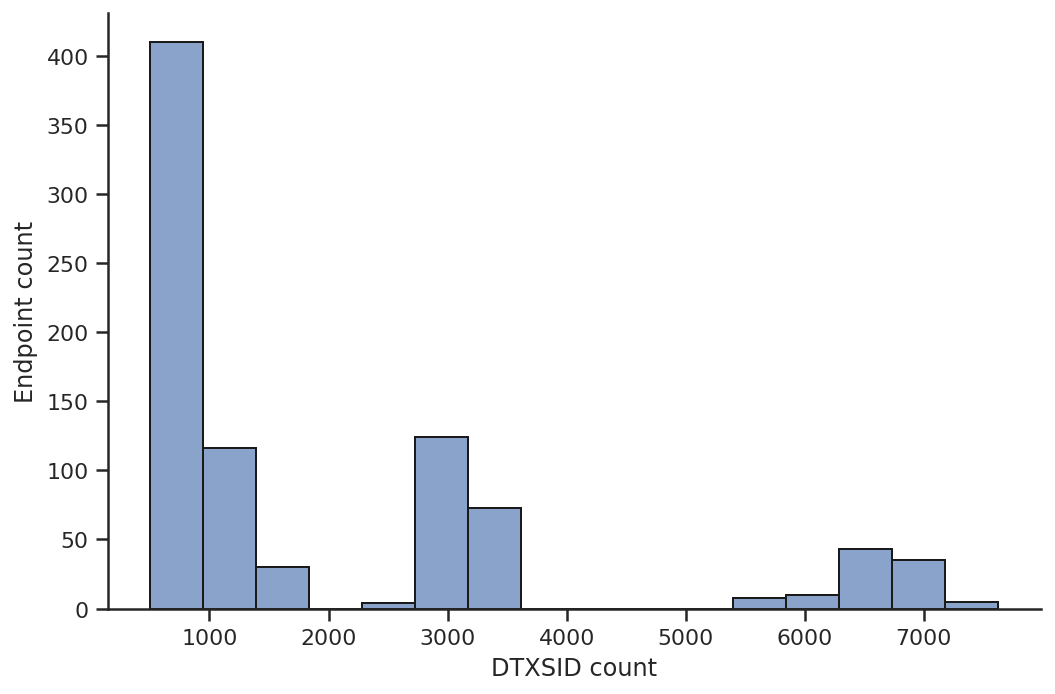

In [146]:
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.displot(data=df_ctb, x='DTXSID_count', palette="RdYlGn",
            height=5, aspect=1.5, alpha = 0.85, edgecolor="k")
g.set(xlabel='DTXSID count', ylabel='Endpoint count')
plt.savefig('../plots/tox21/kdeplot_DTXSID-per-ctb_hist.svg', bbox_inches = 'tight', dpi=300)

<Figure size 504x360 with 0 Axes>

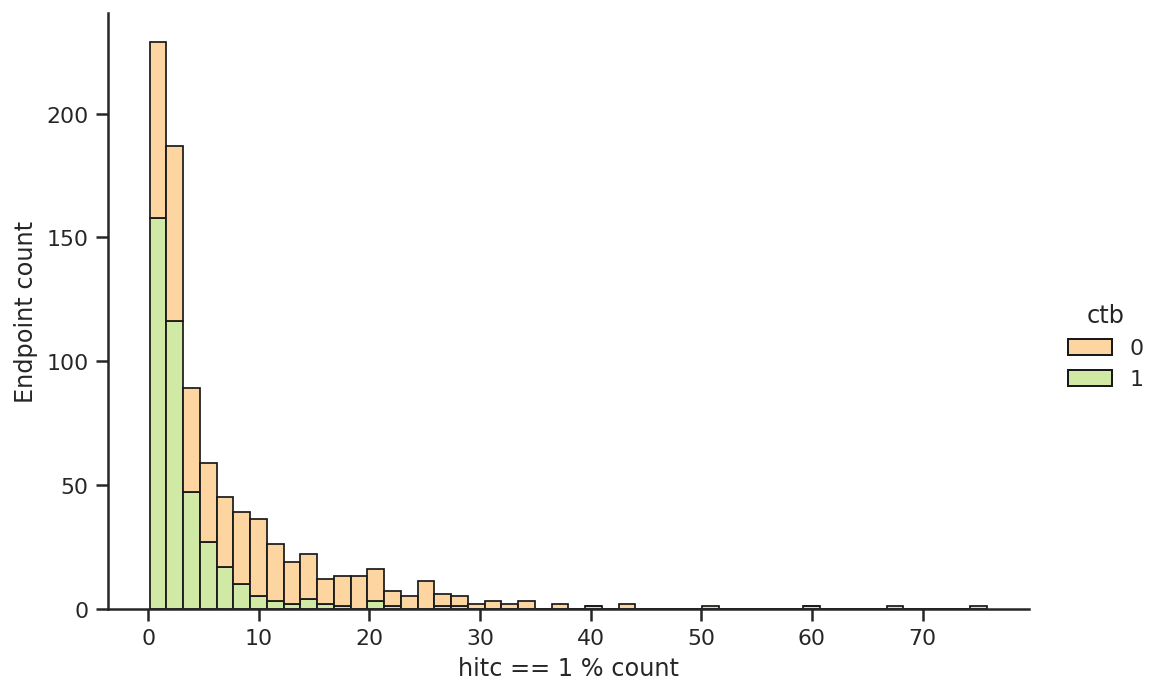

In [132]:
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.displot(data=df_ctb, x='perc_hit', hue='ctb', multiple="stack", palette="RdYlGn",
            height=5, aspect=1.5, alpha = 0.85, edgecolor="k")
g.set(xlabel='hitc == 1 % count', ylabel='Endpoint count')
plt.savefig('../plots/tox21/kdeplot_hitc-per-ctb_hist.svg', bbox_inches = 'tight', dpi=300)

In [144]:
df_ctb.columns
df_ctb.perc_hit.min()

0.1178376785977316